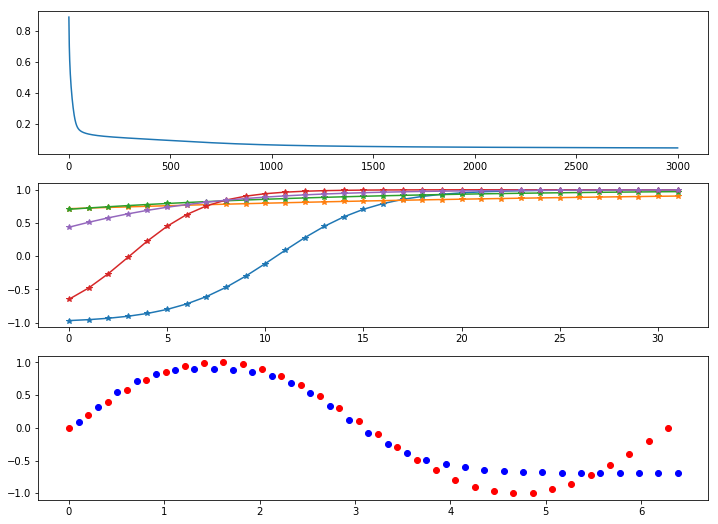

[ 2 5 1 ] Activation: tanh Iterations: 3000 Learning rate: 0.005 Final loss: 0.046956722843042024 Time: 0.5654549598693848


In [2]:
#   A Very Simple Neural Network in Python 3 with Numpy
import numpy as np
import matplotlib.pyplot as plt
import math, time

epochs = 3000
batchSize = 4
#activation = 'sigmoid'
activation = 'tanh'
#activation = 'ReLU'

def f(x): return np.sin(x)

minx, maxx = 0, 6.28
miny, maxy = -1, 1
numx = int(maxx * 5 + 1)
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 5, 1

funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                      lambda x: x * (1 - x),  (0,  1), .45),
            'tanh':  (lambda x: np.tanh(x),
                      lambda x: 1 - x**2,     (0, -1), 0.005),
            'ReLU':  (lambda x: x * (x > 0),
                      lambda x: x > 0,        (0, maxx), 0.0005),
        }
(activate, activatePrime, (mina, maxa), L) = funcs[activation]

X = x = np.linspace(minx, maxx, num=numx)
X.shape = (numx, 1)
Y = y = f(X)
Y = (Y - miny)*(maxa - mina)/(maxy - miny) + mina   # normalise into activation

# add a bias unit to the input layer
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)

# Random initial weights
r0 = math.sqrt(2.0/(inputLayerSize))
r1 = math.sqrt(2.0/(hiddenLayerSize))
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize),low=-r0,high=r0)
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize),low=-r1,high=r1)

def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])

start = time.time()
lossHistory = []

for i in range(epochs):         # Training:
    epochLoss = []

    for (Xb, Yb) in next_batch(X, Y):

        H = activate(np.dot(Xb, Wh))            # hidden layer results
        Z = activate(np.dot(H,  Wz))            # output layer results
        E = Yb - Z                              # how much we missed (error)
        epochLoss.append(np.sum(E**2))

        dZ = E * activatePrime(Z)               # delta Z
        dH = dZ.dot(Wz.T) * activatePrime(H)    # delta H
        Wz += H.T.dot(dZ) * L                   # update output layer weights
        Wh += Xb.T.dot(dH) * L                  # update hidden layer weights

    mse = np.average(epochLoss)
    lossHistory.append(mse)

X[:, 1] += maxx/(numx-1)/2
H = activate(np.dot(X, Wh))
Z = activate(np.dot(H, Wz))
Z = ((miny - maxy) * Z - maxa * miny + maxy * mina)/(mina - maxa)
Y = y

end = time.time()

plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(lossHistory)
plt.subplot(312)
plt.plot(H, '-*')
plt.subplot(313)
plt.plot(x, Y, 'ro')    # training data
plt.plot(X[:, 1], Z, 'bo')   # learned
plt.show()

print('[', inputLayerSize, hiddenLayerSize, outputLayerSize, ']',
      'Activation:', activation, 'Iterations:', epochs,
      'Learning rate:', L, 'Final loss:', mse, 'Time:', end - start)

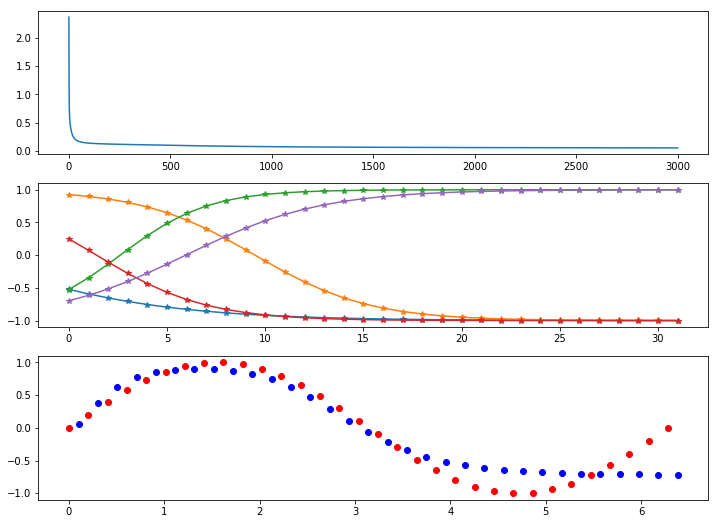

[ 2 5 1 ] Activation: tanh Iterations: 3000 Learning rate: 0.005 Final loss: 0.0553481392871122 Time: 0.5747165679931641


In [5]:
#   A Very Simple Neural Network in Python 3 with Numpy
import numpy as np
import matplotlib.pyplot as plt
import math, time

epochs = 3000
batchSize = 4
#activation = 'sigmoid'
activation = 'tanh'
#activation = 'ReLU'

def f(x): return np.sin(x)

minx, maxx = 0, 6.28
miny, maxy = -1, 1
numx = int(maxx * 5 + 1)
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 5, 1

funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                      lambda x: x * (1 - x),  (0,  1), .45),
            'tanh':  (lambda x: np.tanh(x),
                      lambda x: 1 - x**2,     (0, -1), 0.005),
            'ReLU':  (lambda x: x * (x > 0),
                      lambda x: x > 0,        (0, maxx), 0.0005),
        }
(activate, activatePrime, (mina, maxa), L) = funcs[activation]

X = x = np.linspace(minx, maxx, num=numx)
X.shape = (numx, 1)
Y = y = f(X)
Y = (Y - miny)*(maxa - mina)/(maxy - miny) + mina   # normalise into activation

# add a bias unit to the input layer
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)

# Random initial weights
r0 = math.sqrt(2.0/(inputLayerSize))
r1 = math.sqrt(2.0/(hiddenLayerSize))
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize),low=-r0,high=r0)
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize),low=-r1,high=r1)

def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])

start = time.time()
lossHistory = []

for i in range(epochs):         # Training:
    epochLoss = []

    for (Xb, Yb) in next_batch(X, Y):

        H = activate(np.dot(Xb, Wh))            # hidden layer results
        Z = activate(np.dot(H,  Wz))            # output layer results
        E = Yb - Z                              # how much we missed (error)
        epochLoss.append(np.sum(E**2))

        dZ = E * activatePrime(Z)               # delta Z
        dH = dZ.dot(Wz.T) * activatePrime(H)    # delta H
        Wz += H.T.dot(dZ) * L                   # update output layer weights
        Wh += Xb.T.dot(dH) * L                  # update hidden layer weights

    mse = np.average(epochLoss)
    lossHistory.append(mse)

X[:, 1] += maxx/(numx-1)/2
H = activate(np.dot(X, Wh))
Z = activate(np.dot(H, Wz))
Z = ((miny - maxy) * Z - maxa * miny + maxy * mina)/(mina - maxa)
Y = y

end = time.time()

plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(lossHistory)
plt.subplot(312)
plt.plot(H, '-*')
plt.subplot(313)
plt.plot(x, Y, 'ro')    # training data
plt.plot(X[:, 1], Z, 'bo')   # learned
plt.show()

print('[', inputLayerSize, hiddenLayerSize, outputLayerSize, ']',
      'Activation:', activation, 'Iterations:', epochs,
      'Learning rate:', L, 'Final loss:', mse, 'Time:', end - start)